In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score

# SK-learn

# Снижение размерности

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [3]:
cov1 = np.cov(X)

In [9]:
cov1

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [4]:
# считает по строчно 
cov1.shape

(150, 150)

In [6]:
cov1_ = np.cov(X.T)

In [7]:
cov1_.shape

(4, 4)

In [ ]:
# ЕСЛИ  ДАННЫЕ ЦЕНТРИРУЕМ,ЭТО ЗНАЧИТ ЧТО МЫ ИЗ ДАННЫХ ВЫЧИТАЕМ СРЕДНЕЕ И СДВИГАЕМ ЦЕНТР К НУЛЮ.
# И МАТ.ОЖИДАНИЕ БУДЕТ РАВНА НУЛЮ. И У НАС ОСТАНЕТСЯ ИЗ ФОРМУЛЫ X*X.T (ФОРМУЛА ЛЕКЦИИ 23 ВРЕМЯ 0.37 МИН)
#

In [8]:
# X_centered мы центрируем наши данные 
X_centered = X - X.mean(axis = 0)
cov2 = X_centered.T @ X_centered

In [10]:
cov2 = cov2 /150

#где 150 мат.ожидание,у нас это среднее значение.

# cov1 и cov2 считай тоже самое, cov2 мы деалем сами руками из нашей формулы презетнации лекции 23, время 0.40 мин.

In [11]:
cov2

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [12]:
 #нам нужны теперь собственные значения
# собственный ветор( 4 значения выше они записаны в строчки)    
np.linalg.eig(cov2)
    


(array([4.20005343, 0.24105294, 0.0776881 , 0.02367619]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [13]:
#СИНГУЛЯРНОЕ РАЗЛОЖЕНИЕ МАТРИЦЫ:собственные ветор,они записаны в столбики
np.linalg.svd(X_centered)

(array([[-1.06937444e-01, -5.31164840e-02,  8.17734010e-03, ...,
          5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
        [-1.08133305e-01,  2.94357038e-02,  6.16531816e-02, ...,
          5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
        [-1.15099407e-01,  2.41054172e-02, -5.24368218e-03, ...,
          2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
        ...,
        [ 7.02927688e-02, -1.31144057e-02, -3.82231512e-02, ...,
          9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
        [ 7.57348450e-02, -1.93954931e-02, -2.11868549e-01, ...,
         -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
        [ 5.53860977e-02,  4.70071528e-02, -1.06310369e-01, ...,
         -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]]),
 array([25.09996044,  6.01314738,  3.41368064,  1.88452351]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
        [ 0.58202985, -0.59791083, -0.07623

In [ ]:
# Разминка с матрицей ковариации
# Центрирование
# 

In [20]:
# stratify=y, важно
# DecisionTreeClassifier  БЕРЕМ чтобы рассмотреть дату на полных данных и на понижении размерности.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# stratify=y - этот параметр обеспечит нам баланс классов в наших множеств,т.е. в тестовом множестве будет столько же первых ириосв, сколько вторых и третьих.


# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)
# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,preds))

Accuracy:  0.8888888888888888


In [21]:
# stratify=y - этот параметр обеспечит нам баланс классов в наших множеств,т.е. в тестовом множестве будет столько же первых ириосв, сколько вторых и третьих.

# проверка на параметр stratify=y, что у нас везде 15 ирисов
np.sum(y_test ==0 )

15

In [18]:
# проверка на параметр stratify=y, что у нас везде 15 ирисов
np.sum(y_test ==1 )

15

In [19]:
# проверка на параметр stratify=y, что у нас везде 15 ирисов
np.sum(y_test ==2 )

15

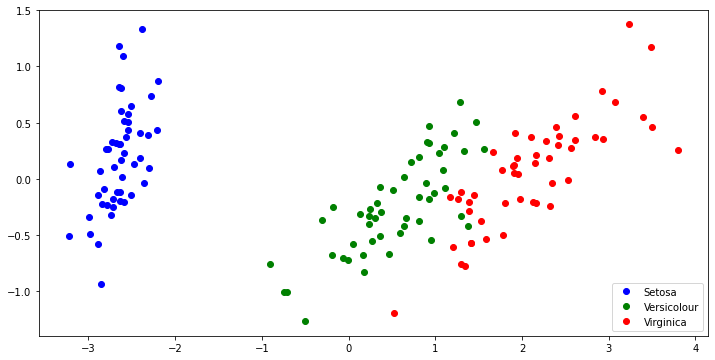

In [22]:
# Понизим размерность с 4 до 2
from sklearn.decomposition import PCA
# pca = PCA(n_components=2) - создаем наш преобразователь
pca = PCA(n_components=2)
# X_centered - центрирование наших данных
X_centered = X - X.mean(axis=0)
# pca.fit(X_centered) - обучили с помощью fit наш трансформер(преобразователь )на основе центрированных данных
pca.fit(X_centered)
# получаем наши преобразованные данные, фактически проекцияна координаты с самыми хорошими дисперсиями!
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

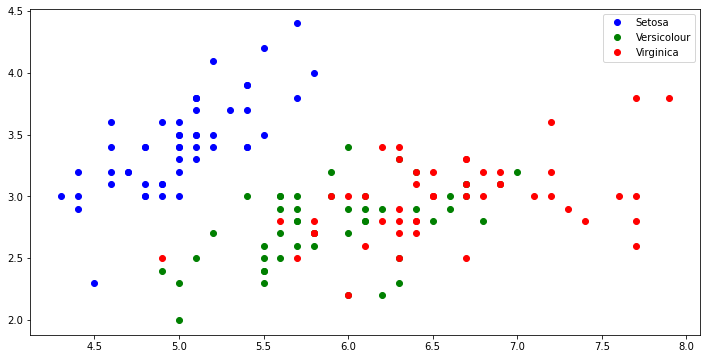

In [23]:
# И нарисуем получившиеся точки в нашем новом пространстве
# ДО ПОНИЖЕНИЯ
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', label='Setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go', label='Versicolour')
plt.plot(X[y == 2, 0], X[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [24]:
# Повторим классификацию деревом по построенному преобразованию данных
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,preds))

#ПОСЛЕ ПОНИЖЕНИЯ НАШ РЕЗУЛЬТАТ СТАЛ ЛУЧШЕ

Accuracy:  0.9111111111111111


In [25]:
#этот атрибут, объяснение:у нас есть два измерения и по каждому измерению он считает,
#какое общее количество дисперсии объяснено каждым вектором
# ответ: array([0.92461872, 0.05306648])
# в нашем случае первый собственный вектор объясняет 92% дисперсии
#
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [26]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

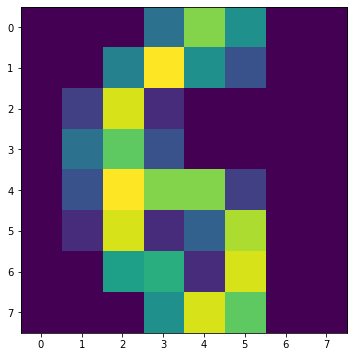

In [27]:
plt.imshow(X[598].reshape((8,8)))

In [28]:
X.shape

(1797, 64)

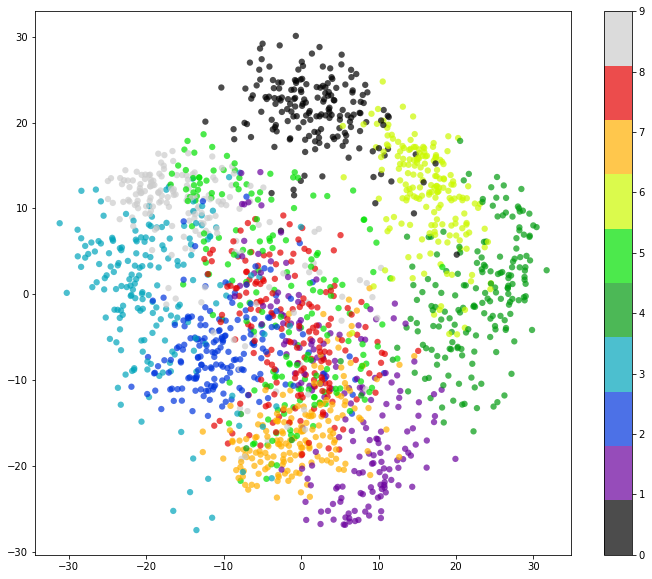

In [29]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();



In [83]:
#var = pca.explained_variance_ratio_
#var.sum()

In [12]:
# Восстановление сжатых данных в отдельный массив
X_recovered = pca.inverse_transform(X_reduced)

In [18]:
#X_recovered.shape

In [17]:
#plt.imshow(X_recovered[598].reshape((8,8)))

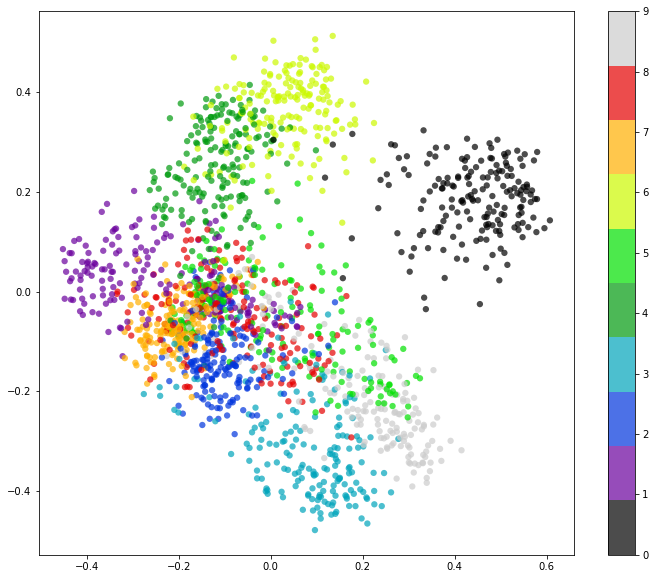

In [31]:
#kernel
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=2, kernel = 'rbf', gamma = 0.001)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();


In [ ]:
# проверить score
# для восстановления fit_inverse_transform  =  True

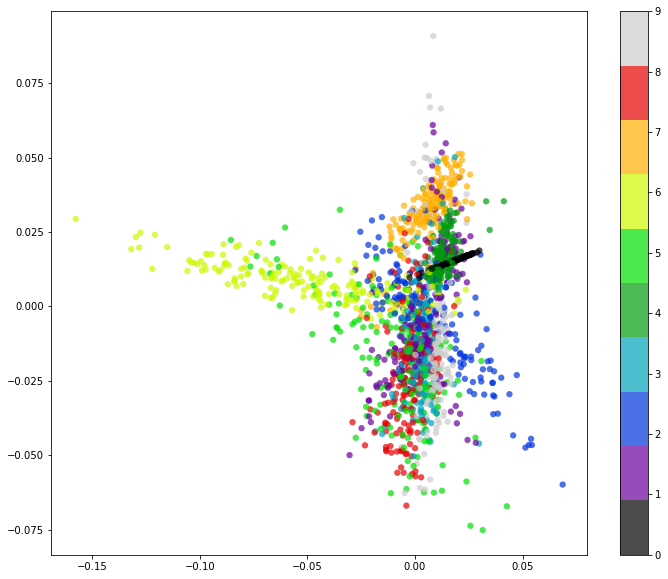

In [32]:
# Локальное линейное вложение.
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding (n_components = 2, n_neighbors = 25)

X_reduced = lle.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();



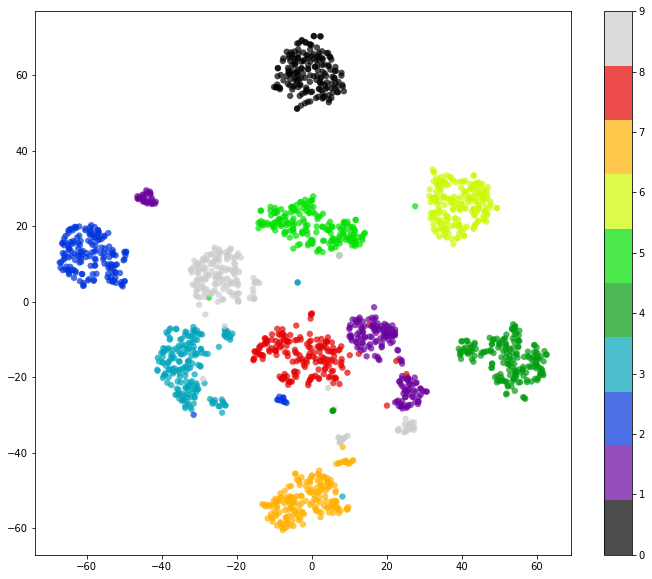

In [33]:
# TSNE
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();


In [34]:
#Как всегда возьмем дерево.
#и обучим на результате трансформации t-SNE
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=9, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [35]:
print('Accuracy: ',accuracy_score(y_test,preds))

Accuracy:  0.975925925925926


In [ ]:
# теперь посчитаем без tSNE но по 64 признакам

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=9, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [192]:
#print('Accuracy: ',accuracy_score(y_test,preds))

# Нейронные Сети
## Первый пример

In [37]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [38]:
# Осмотримся 
train_images.shape

(60000, 28, 28)

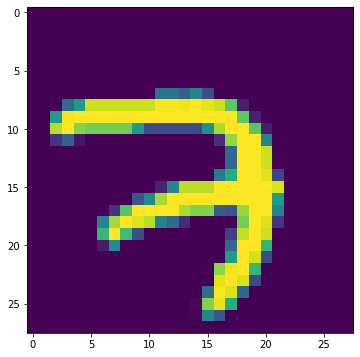

In [39]:
plt.imshow(train_images[5000]);

In [40]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
train_labels[5000]

7

In [40]:
#test_images.shape

In [42]:
# Архитектура и модель
from tensorflow.keras import models
from tensorflow.keras import layers

# models.Sequential() - слои формируются один за другим

model = models.Sequential()
#класс layers, Dense - самый простой нейрон,где 10 - количество нейронов, activation="relu" - функция активации,
# input_shape = (28*28, - один вектор размером 28 на 28 #
model.add(layers.Dense(512, activation="relu", input_shape = (28*28,)))
model.add(layers.Dense(10, activation="softmax"))
# activation="softmax"  - принимает значения в каждом из нейронов от 0 до 1 и оценивает вероятность принадлежности наших данных
# к тому или иному классу

In [43]:
# Компиляция модели
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# loss="sparse_categorical_crossentropy" - функция потерь 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
# ДАННЫЕ ВСЕГДА НАДО МАСШТАБИРОВАТЬ
# подготовка данных
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [49]:
# epochs=5 - будет прямое распростанение, оценка ошибки, обратное распространение,просмтор всего нашего датасета
# batch_size=128 - наш датасет будет рассматриваться по 128 примеров.,оценена ошибка на 128 пример,обратное распространение и т.д.
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 7ms/step - loss: 2.0863 - accuracy: 0.4718
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 1.4213 - accuracy: 0.7042
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.9140 - accuracy: 0.7965
Epoch 4/5
469/469 [==============================] - 13s 27ms/step - loss: 0.6630 - accuracy: 0.8434
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5246 - accuracy: 0.8705


In [50]:
# прогнозирование
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 4s 4s/step


array([2.1703256e-04, 2.4975043e-05, 9.5674128e-05, 1.1541346e-03,
       3.3485814e-04, 4.5404988e-04, 3.2278137e-06, 9.8382795e-01,
       1.9256481e-04, 1.3695607e-02], dtype=float32)

In [52]:
predictions[0].argmax()

7

In [53]:
test_labels[0]

7

In [51]:
predictions.shape

(10, 10)

In [54]:
# прогноз для всего тестового множества:

test_digits = test_images
predictions = model.predict(test_digits)


313/313 [==============================] - 4s 3ms/step


In [55]:
predictions.shape

(10000, 10)

In [56]:
pred  = predictions.argmax(axis = 1)

In [57]:
pred

array([7, 2, 1, ..., 9, 5, 6], dtype=int64)

In [58]:
accuracy_score(test_labels,pred)

0.8844

In [59]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 4ms/step - loss: 0.4618 - accuracy: 0.8844


[0.4617646336555481, 0.8844000101089478]